## BaggingClassifier (Decision Tree)

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('repurchase_training.csv')

encoder = LabelEncoder()
df['age_band'] = encoder.fit_transform(df['age_band'])
df['gender'] = encoder.fit_transform(df['gender'])
df['car_model'] = encoder.fit_transform(df['car_model'])
df['car_segment'] = encoder.fit_transform(df['car_segment'])

# Split data into training and testing sets
X = df.drop(['ID', 'Target'], axis=1)  # Features
y = df['Target']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Bagging Decision Tree model
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                 n_estimators=10,
                                 random_state=42)

# Train the model on the training set
bagging_clf.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model's accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9929572102938937


In this code, we first load the data into a pandas DataFrame and split it into training and testing sets. We then build a Bagging Decision Tree model using the BaggingClassifier from the scikit-learn library. The base estimator for this model is a DecisionTreeClassifier, and we have set the number of estimators to 10. We then train the model on the training set and predict the target variable for the test set. Finally, we evaluate the model's accuracy on the test set using the accuracy_score function from scikit-learn.

In [2]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Calculate classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[25562    46]
 [  139   521]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25608
           1       0.92      0.79      0.85       660

    accuracy                           0.99     26268
   macro avg       0.96      0.89      0.92     26268
weighted avg       0.99      0.99      0.99     26268



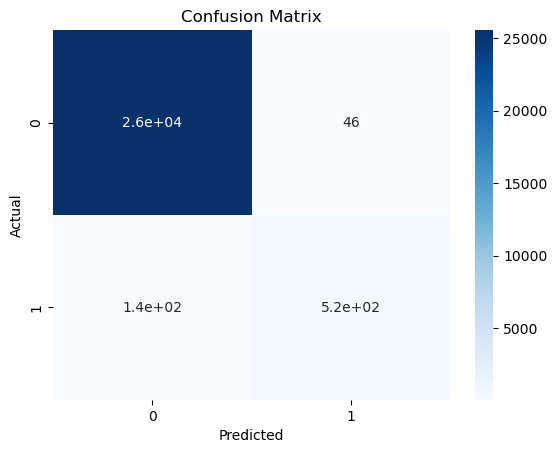

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This code uses the confusion_matrix function from sklearn.metrics to compute a confusion matrix for the predictions on the test set. It then uses seaborn to create a heatmap of the confusion matrix. This plot helps in visualizing the number of true positives, true negatives, false positives, and false negatives for the model.

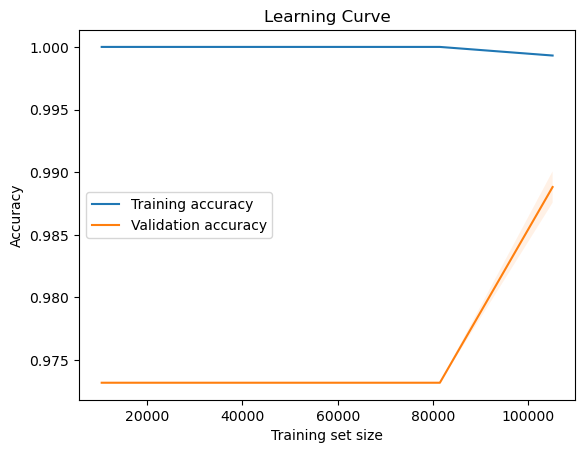

In [4]:
from sklearn.model_selection import learning_curve
import numpy as np

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(bagging_clf, X, y, cv=5, scoring='accuracy')
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

This code uses the learning_curve function from sklearn.model_selection to compute the training and validation accuracy for different sizes of the training set. It then creates a plot of the learning curve using matplotlib. This plot helps in identifying whether the model is overfitting or underfitting the data, and whether increasing the size of the training set would improve performance.